Phase 1: About the data
The Netflix Movies & TV Shows dataset can be found on Kaggle. It contains all TV Shows and Movies metadata available on Netflix. The dataset is updated every month. It contains 8807 records and 12 columns.

Netflix was founded on August 29, 1997, as a mail-based rental business. In January 2007, the company launched a streaming media service, introducing video on demand via the Internet.

Objective
The purpose of this analysis is to answer the following questions:

Number of movies/tv-shows added to the streaming platform by year
Which month has the most added movies/tv-shows?
Which day has the most added movies/tv-shows?
How many Movies vs. TV-Shows?
Which year has the most releases Movies/TV-Shows?
Which is the oldest movie/tv-show on streaming?
Which countries produce the most movies/tv-shows?
Cast members with the most content

Phase 2: Data prep

#Importing Libraries

In [1]:
import pandas as pd 
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"

#Loading the dataset with Pandas

In [3]:
netflix = pd.read_csv("C:\\Users\\brullan\\Downloads\\netflix_titles.csv\\netflix_titles.csv") 
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#column names and types 

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Numerical column 'describe'

In [5]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Phase 3: Process

#Checking for missing data

In [6]:
missing_data = netflix.isna().sum().sort_values(ascending=False)
missing_data

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
netflix_isna = pd.isna(netflix['director'])
netflix[netflix_isna]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


#checking for duplicates

In [8]:
netflix['show_id'].duplicated().any()

False

#Changing the date format of the column 'date_added' to 'datetime'

In [9]:
netflix['date_added']= pd.to_datetime(netflix['date_added'].str.strip(), format= "%B %d, %Y") 
netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#Checking unique type of data of the column 'Type', There are only two types of data: Movie and TV Show

In [10]:
type_data = netflix.type.unique()
type_data

array(['Movie', 'TV Show'], dtype=object)

Phase 4 Exploratory Data Analysis
Number of movies/tv-shows added to the streaming platform by Year

In [11]:
# year with the most added movies/tv-shows
netflix_release_year = netflix.date_added.dt.year.astype('Int64').value_counts()
netflix_release_year

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: date_added, dtype: Int64

The month with the most added movies/tv-shows

In [12]:
netflix_release_month = netflix.date_added.dt.month.astype('Int64').value_counts()
netflix_release_month

7     827
12    813
9     770
4     764
10    760
8     755
3     742
1     738
6     728
11    705
5     632
2     563
Name: date_added, dtype: Int64

Day with the most added movies/tv-shows

In [13]:
netflix_release_day = netflix.date_added.dt.day.astype('Int64').value_counts()
netflix_release_day

1     2212
15     687
2      325
16     289
31     274
20     249
19     243
5      231
22     230
10     214
30     210
6      210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
4      175
13     175
24     159
3      151
11     149
9      147
29     141
Name: date_added, dtype: Int64

Number of Movies vs. TV-Shows

In [14]:
netflix_type = netflix.type.value_counts()
netflix_type

Movie      6131
TV Show    2676
Name: type, dtype: int64

The year with the most releases movies/tv-shows

In [15]:
movietv_release_year = netflix.release_year.value_counts()
movietv_release_year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

The oldest movie/tv-show on streaming

In [16]:
netflix[netflix['release_year']== 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


Top 30 Countries producing the most movies/tv-shows

In [17]:
# country unique
#netflix['country'].unique()
# new dataset for the country count
country_count = netflix.copy()
country_count = pd.concat([country_count, netflix['country'].str.split(",", expand=True)], axis=1)
country_count = country_count.melt(id_vars=["type","title"], value_vars=range(12), value_name="Country")
country_count = country_count[country_count["Country"].notna()]
country_count["Country"] = country_count["Country"].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [18]:
# countries unique
country_count.Country.unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', 'Sovie

In [19]:
# countries with the most number of content streaming
country_count.Country.value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Armenia              1
Sri Lanka            1
Cuba                 1
Nicaragua            1
Mongolia             1
Name: Country, Length: 123, dtype: int64

Top 30 Cast members with the most content

In [20]:
#New dataset for the cast count
cast_count = netflix.copy()
cast_count = pd.concat([cast_count, netflix['cast'].str.split(",", expand=True)], axis=1)
cast_count = cast_count.melt(id_vars=["type","title"], value_vars=range(44), value_name="Cast_name")
cast_count = cast_count[cast_count["Cast_name"].notna()]
cast_count["Cast_name"] = cast_count["Cast_name"].str.strip()
cast_count

,type,title,variable,Cast_name
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
380555,TV Show,Social Distance,43,Niles Fitch
382150,TV Show,Creeped Out,43,Andonis Anthony
382475,TV Show,Black Mirror,43,Michael Smiley
382921,TV Show,COMEDIANS of the world,43,Adib Alkhalidey


In [21]:
cast_count.Cast_name.value_counts()[:30]

Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Takahiro Sakurai       32
Naseeruddin Shah       32
Rupa Bhimani           31
Om Puri                30
Akshay Kumar           30
Yuki Kaji              29
Amitabh Bachchan       28
Paresh Rawal           28
Boman Irani            27
Vincent Tong           26
Rajesh Kava            26
Andrea Libman          25
Kareena Kapoor         25
John Cleese            24
Samuel L. Jackson      24
Tara Strong            23
Jigna Bhardwaj         23
Fred Tatasciore        23
Daisuke Ono            22
Ajay Devgn             21
Ashleigh Ball          21
Nicolas Cage           21
Nawazuddin Siddiqui    21
Kay Kay Menon          21
Junichi Suwabe         21
Adam Sandler           20
David Attenborough     20
Name: Cast_name, dtype: int64

Phase 5: Visualization

Movies vs. TV-Shows

In [22]:
import plotly.express as px

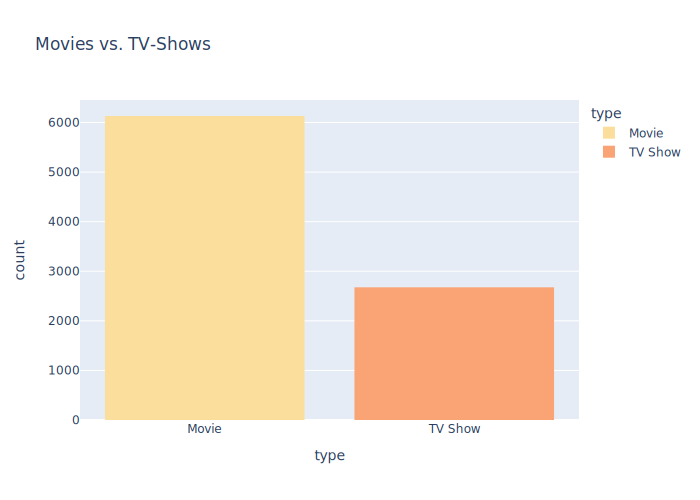

In [23]:
px.histogram(netflix, x= 'type', color= 'type',
             title="Movies vs. TV-Shows",
             color_discrete_sequence= px.colors.sequential.Sunsetdark)

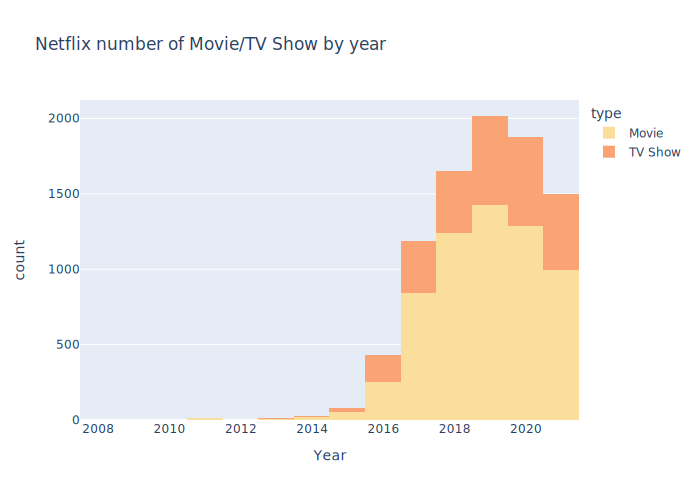

In [24]:
px.histogram(netflix, x= netflix['date_added'].dt.year, color= netflix['type'],
             title="Netflix number of Movie/TV Show by year",
             color_discrete_sequence= px.colors.sequential.Sunsetdark,  
              labels=dict(x="Year", color= "Type")                     
                   )

Number of Movies/TV-Shows added by Month
#Dropping 'NA' records from the column 'date_added'
#Dropping 10 records from the column 'date_added' that contain 'NA' values

In [25]:
#counting the number of 'NA' on the column 'date_added'
netflix['date_added'].isna().sum()

10

In [26]:
#dropping 'NA'
netflix = netflix.dropna(subset=['date_added'])

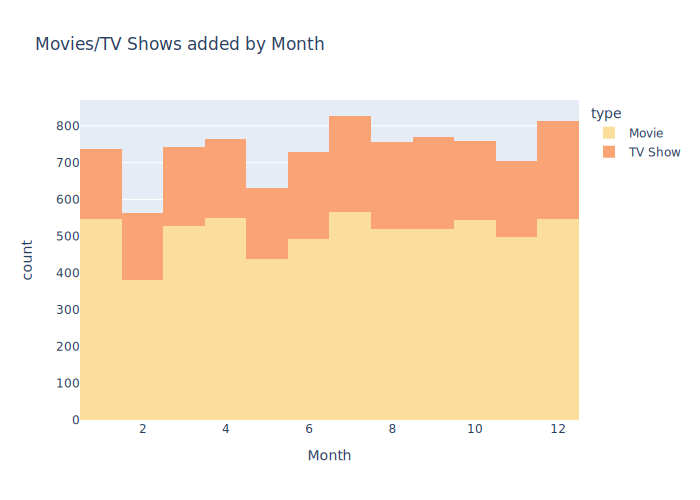

In [27]:
px.histogram(netflix, x= netflix['date_added'].dt.month, color= netflix['type'],
             color_discrete_sequence= px.colors.sequential.Sunsetdark,
             title="Movies/TV Shows added by Month",
             labels=dict(x="Month")) 

Number of Movies/TV-Shows added by Day

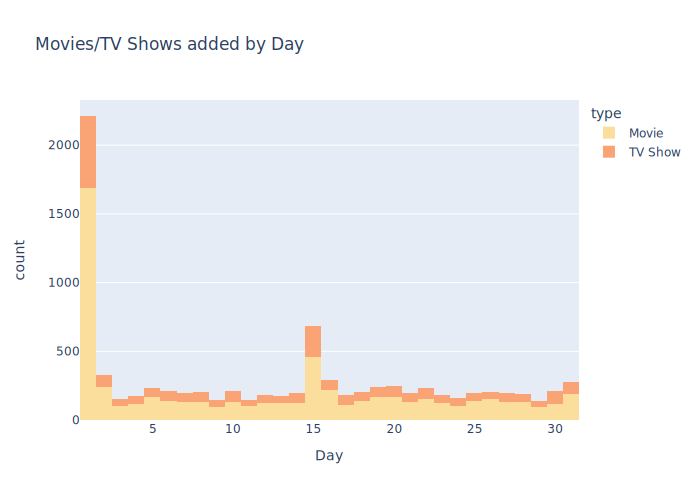

In [28]:
px.histogram(netflix, x= netflix['date_added'].dt.day,color= netflix['type'],
             color_discrete_sequence= px.colors.sequential.Sunsetdark,            
             title="Movies/TV Shows added by Day",
             labels=dict(x="Day")) 

Number of Movies/TV-Shows by year of release

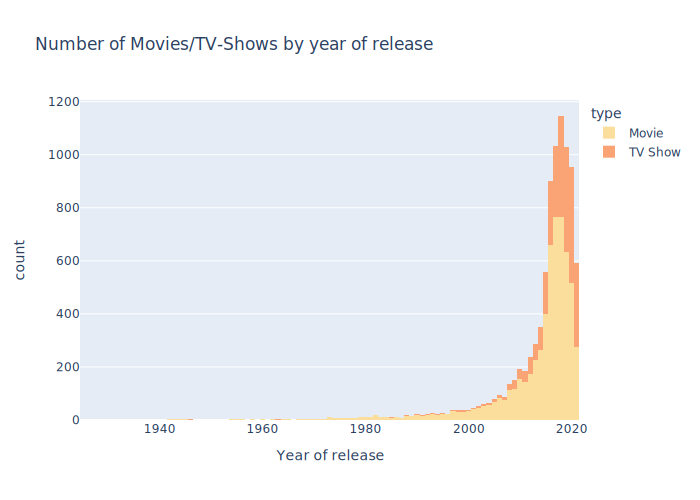

In [29]:
px.histogram(netflix, x= 'release_year', color= 'type',
             title="Number of Movies/TV-Shows by year of release",
             color_discrete_sequence= px.colors.sequential.Sunsetdark,  
             labels={'release_year':'Year of release'}                     
                   )

Top 30 Countries with the most streaming content

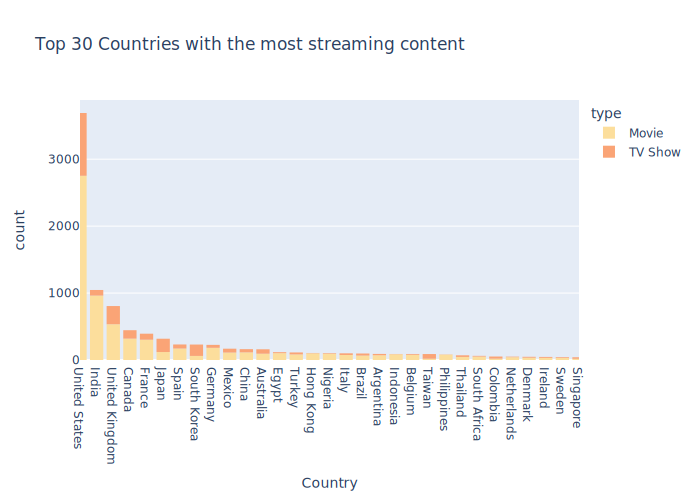

In [30]:
px.histogram(country_count, x= 'Country', color= 'type',
        title="Top 30 Countries with the most streaming content",
        color_discrete_sequence= px.colors.sequential.Sunsetdark).update_xaxes(
        categoryorder="total descending",range=(0, 30))

Findings

About Netflix: 
- There are more Movies than TV-Shows available on streaming. 6131 movies and 2676 tv-shows.
- 2019 was the year with the most content addition on the streaming platform, in 2016 movie/tv-shows added, followed by 2020 with 1879, and 2018 with 1649 total.
- July and December are the months with the most content addition, 827 and 813 movie/tv-shows added.
- Netflix adds content on the first day of the month more than any other day.

About the content 
- Among the contents available 1147 of them were originally released in 2018 followed by 2017 with 1032, and 2019 with 1030 total.
- Pioneers: First Women Filmmakers is the oldest content available on streaming. It's a collection of restored films dating from 1925.
- The United States is the country that produces the most of the content with 3690 titles, followed by India 1046 titles and the United Kingdom 806 titles.
- Anupam Kher is the actor with the higher number of titles, 43 films. Anupam Kher has appeared in over 500 films.